In [23]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

In [34]:
file = uproot.open("/eos/experiment/fcc/ee/tmp/fcc_python_tools/FCCDelphesOutput_10k.root")
tree = file['events']
tree.keys()

['genParticles',
 'genParticles/genParticles.core.pdgId',
 'genParticles/genParticles.core.charge',
 'genParticles/genParticles.core.status',
 'genParticles/genParticles.core.vertex.x',
 'genParticles/genParticles.core.vertex.y',
 'genParticles/genParticles.core.vertex.z',
 'genParticles/genParticles.core.p4.mass',
 'genParticles/genParticles.core.p4.px',
 'genParticles/genParticles.core.p4.py',
 'genParticles/genParticles.core.p4.pz',
 'genParticles/genParticles.core.bits',
 'genParticles#0',
 'genParticles#0/genParticles#0.index',
 'genParticles#0/genParticles#0.collectionID',
 'genParticles#1',
 'genParticles#1/genParticles#1.index',
 'genParticles#1/genParticles#1.collectionID',
 'genVertices',
 'genVertices/genVertices.position.x',
 'genVertices/genVertices.position.y',
 'genVertices/genVertices.position.z',
 'genVertices/genVertices.ctau',
 'mcEventWeights',
 'mcEventWeights/mcEventWeights.value',
 'skimmedGenParticles',
 'skimmedGenParticles/skimmedGenParticles.core.pdgId',
 'sk

In [32]:
g_container = "genParticles.core"
g = tree.arrays(filter_name=f"{g_container}*",how="zip")
ID_cut = abs(g[g_container,"pdgId"]) == abs(lp.D_0.pdgid)
g = g[ID_cut]

In [33]:
g_v_container = "genVertices.position"
g_v = tree.arrays(filter_name=f"{g_v_container}*",how="zip")
g_v[g_v_container,"r"] = np.sqrt(g_v[g_v_container,'x']**2 + g_v[g_v_container,'y']**2 + g_v[g_v_container,'z']**2) 

In [42]:
pairs = ak.cartesian({"p": g[g_container], "v": g_v[g_v_container]})

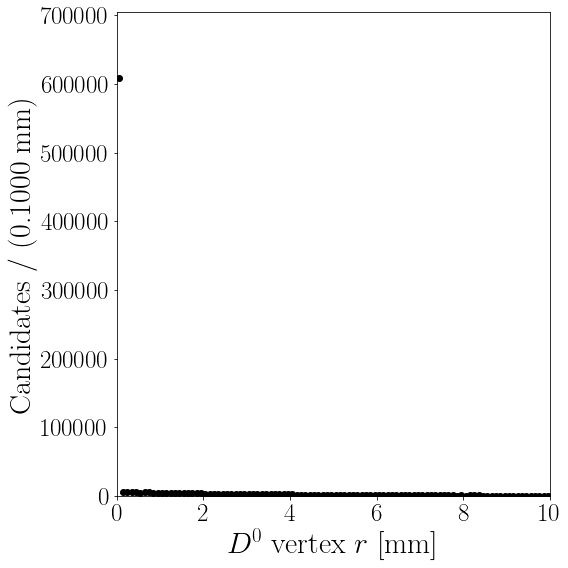

In [43]:
plotting.errorbar_hist(pairs["v"],"r","D_vertex","$D^0$ vertex $r$","mm",0.,10.,100)